In [283]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def circuit(params):
    # |psi_0>: state preparation
    qml.RY(np.pi / 4, wires=0)
    qml.RY(np.pi / 3, wires=1)
    qml.RY(np.pi / 7, wires=2)

    # V0(theta0, theta1): Parametrized layer 0
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)

    # W1: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    # V_1(theta2, theta3): Parametrized layer 1
    qml.RY(params[2], wires=1)
    qml.RX(params[3], wires=2)

    # W2: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    return qml.expval(qml.PauliY(0))


params = np.array([0.432, -0.123, 0.543, 0.233])

In [284]:
circuit(params)

tensor(0.07472305, requires_grad=True)

In [285]:
steps = 200
init_params = np.array([0.432, -0.123, 0.543, 0.233], requires_grad=True)

In [286]:
type(init_params)

pennylane.numpy.tensor.tensor

In [287]:
dcircuit = qml.grad(circuit)

In [288]:
dcircuit(theta)

array([ 2.54794767e-01,  2.85176929e-01, -1.24788906e-01, -5.03069808e-17])

In [153]:
@qml.qnode(dev)
def circuit(params):
    qml.PauliX(0)
    qml.PauliX(1)
    # |psi_0>: state preparation
    qml.RY(np.pi / 4, wires=0)
    qml.RY(np.pi / 3, wires=1)
    qml.RY(np.pi / 7, wires=2)

    # V0(theta0, theta1): Parametrized layer 0
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)

    # W1: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    # V_1(theta2, theta3): Parametrized layer 1
    qml.RY(params[2], wires=1)
    qml.RX(params[3], wires=2)

    # W2: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    return qml.expval(qml.PauliY(0))
    #return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))]

In [154]:
circuit(theta)

tensor(-0.14523251, requires_grad=True)

In [155]:
dcircuit = qml.grad(circuit)

In [156]:
dcircuit(theta)

array([-2.22286809e-01,  2.85176929e-01,  7.95755746e-03,  1.73472348e-17])

In [8]:
gd_cost = []
opt = qml.GradientDescentOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    gd_cost.append(circuit(theta))


In [289]:
%time
qng_cost = []
opt = qml.QNGOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    qng_cost.append(circuit(theta))

CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 29.8 µs


/tmp/ipykernel_978750/1291127154.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


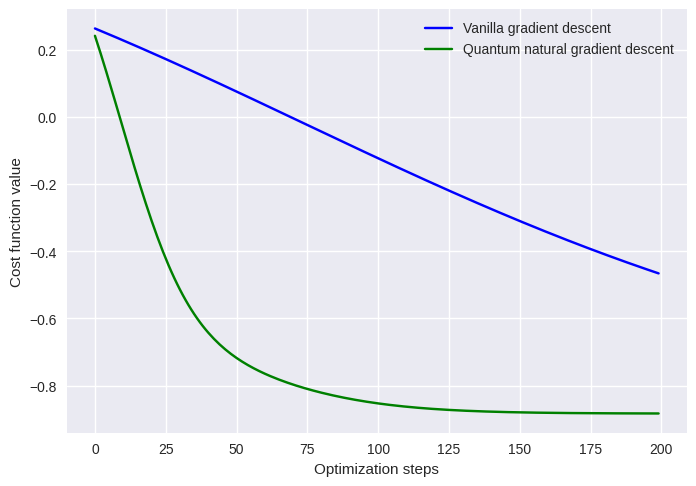

In [10]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
plt.plot(gd_cost, "b", label="Vanilla gradient descent")
plt.plot(qng_cost, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

In [258]:
import torch
a = torch.tensor([1.], requires_grad=True)

In [259]:
b = torch.tensor([1.], requires_grad=True)

In [262]:
c = a-1j*b

In [217]:
c = (a*b)**2

In [218]:
c

tensor([-207.-224.j])

In [228]:
d = torch.norm(a)

In [263]:
d = torch.dot(c.conj(), c)
d = d.real
d

tensor(2., grad_fn=<SelectBackward0>)

In [264]:
d.backward()

In [265]:
a.grad

tensor([2.])

In [266]:
b.grad

tensor([2.])

In [257]:
d.dtype

torch.float32

In [267]:
c

tensor([1.-1.j], grad_fn=<SubBackward0>)

In [268]:
torch.abs(c)

tensor([1.4142], grad_fn=<AbsBackward0>)

In [269]:
torch.norm(c)

tensor(1.4142, grad_fn=<NormBackward1>)

In [270]:
c.real

tensor([1.], grad_fn=<SelectBackward0>)